# Running Inference
This notebook will contain demonstrations on how to run inference using the SRGAN network. 

In [2]:
import os
import sys
sys.path.append('libs/')
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

from libs.srgan import SRGAN
from libs.util import DataLoader

Using TensorFlow backend.


# 1. Load model & Weights

In [7]:
# Instantiate the model
gan = SRGAN(upscaling_factor=2)
gan.generator.summary()

# Load weights - this assumes you've already trained the network!
# Replace filename with the location of your trained weights
gan.load_weights('./model/SRGAN_places365_generator_2X.h5')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-gen (InputLayer)          (None, None, None, 3 0                                            
__________________________________________________________________________________________________
Conv2d-pre (Conv2D)             (None, None, None, 6 15616       Input-gen[0][0]                  
__________________________________________________________________________________________________
PReLU-pre (PReLU)               (None, None, None, 6 64          Conv2d-pre[0][0]                 
__________________________________________________________________________________________________
conv2d_153 (Conv2D)             (None, None, None, 6 36928       PReLU-pre[0][0]                  
__________________________________________________________________________________________________
batch_norm

## 2.2. Inference on images from internet

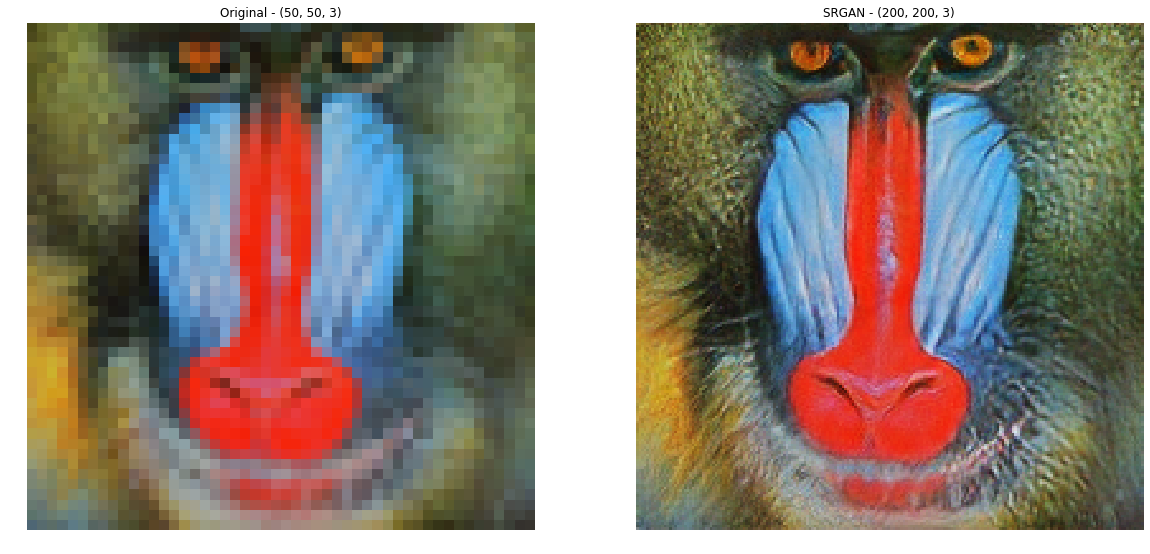

In [14]:
# Load image
img_lr = DataLoader.load_img("./images/baboon-lowRes.png").astype(np.uint8)

# Resize image (you can skip this if you are doing it on original image)
img_lr = np.array(Image.fromarray(img_lr).resize((50,50), Image.BICUBIC))

# Scale image
img_lr = DataLoader.scale_lr_imgs(img_lr)

# Predict high-resolution version (add batch dimension to image)
img_sr = np.squeeze(
    gan.generator.predict(
        np.expand_dims(img_lr, 0), 
        batch_size=1
    ), 
    axis=0
)

# Unscale colors
img_sr = DataLoader.unscale_hr_imgs(img_sr).astype(np.uint8)
img_lr = DataLoader.unscale_lr_imgs(img_lr).astype(np.uint8)

# Images and titles
images = {
    'Original': img_lr, 
    'SRGAN': img_sr, 
}

# Plot the images. Note: rescaling and using squeeze since we are getting batches of size 1                    
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
for i, (title, img) in enumerate(images.items()):    
    axes[i].imshow(img)
    axes[i].set_title("{} - {}".format(title, img.shape))
    axes[i].axis('off')
plt.show()